In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('tas.csv',sep='\t')

In [6]:
df

,Question,Clear marks,Obtain marks,Time,Test_result
0,10,7,10,10,0
1,10,7,10,9,0
2,10,7,10,8,0
3,10,7,10,7,0
4,10,7,10,6,1
...,...,...,...,...,...
75,10,7,1,7,0
76,10,7,1,6,0
77,10,7,1,5,0
78,10,7,1,4,0


In [7]:
train_data = df.sample(frac=0.8)
train_data

,Question,Clear marks,Obtain marks,Time,Test_result
71,10,7,2,3,0
9,10,7,9,9,0
27,10,7,7,7,0
51,10,7,4,7,0
29,10,7,7,5,1
...,...,...,...,...,...
18,10,7,8,8,0
73,10,7,1,9,0
78,10,7,1,4,0
74,10,7,1,8,0


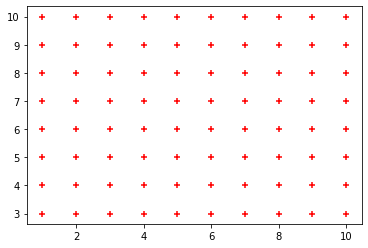

In [8]:
from homemade.logistic_regression import LogisticRegression
plt.scatter(df['Obtain marks'],df.Time,marker='+',color='red')

In [9]:
test_data = df.drop(train_data.index)
test_data

,Question,Clear marks,Obtain marks,Time,Test_result
2,10,7,10,8,0
5,10,7,10,5,1
16,10,7,8,10,0
20,10,7,8,6,1
22,10,7,8,4,1
24,10,7,7,10,0
33,10,7,6,9,0
44,10,7,5,6,0
47,10,7,5,3,0
50,10,7,4,8,0


In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [11]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df[['Obtain marks','Time']],df['Test_result'],train_size=0.9)

In [27]:
X_test

,Obtain marks,Time
1,10,9
48,4,10
73,1,9
24,7,10
64,2,10
30,7,4
10,9,8
21,8,5


In [28]:
model.fit(X_train, y_train)

C:\Users\PC\Anaconda3\ana\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
X_test

,Obtain marks,Time
1,10,9
48,4,10
73,1,9
24,7,10
64,2,10
30,7,4
10,9,8
21,8,5


In [30]:
y_predicted = model.predict(X_test)

In [31]:
model.predict_proba(X_test)

array([[9.31443767e-01, 6.85562333e-02],
       [9.99923772e-01, 7.62277568e-05],
       [9.99984271e-01, 1.57292527e-05],
       [9.98726542e-01, 1.27345802e-03],
       [9.99988344e-01, 1.16559226e-05],
       [3.17030202e-01, 6.82969798e-01],
       [9.09650061e-01, 9.03499393e-02],
       [3.85150883e-01, 6.14849117e-01]])

In [32]:
model.score(X_test,y_test)

1.0

In [33]:
model.predict(X_train)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0], dtype=int64)

In [34]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [35]:
model.score(X_train,y_train)

0.9305555555555556

In [36]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [37]:
input_param_name = 'Obtain marks'
input_param_name
output_param_name = 'Time'
output_param_name

'Time'

In [42]:
model.predict([[10,6]])

array([1], dtype=int64)

In [43]:
X_test

,Obtain marks,Time
1,10,9
48,4,10
73,1,9
24,7,10
64,2,10
30,7,4
10,9,8
21,8,5
